This post is based on content from the "Topics in Magnetohydrodynamics" lecture in 2023 by Professor [Tetsuya Magara](http://solardynamicslab.khu.ac.kr/~magara/) at Kyung Hee University.

# Obtaining the dispersion relation

First, import SymPy and define the necessary symbols.

In [ ]:
from sympy import *

In [ ]:
rho, p, vx, vz = symbols(r'\rho_1^{**} p_1^{**} v_{1x}^{**} v_{1z}^{**}')
w, H, gamma = symbols(r'\omega H \gamma')
rho0, p0, g0, cs0 = symbols(r'\rho_0 p_0, g_0, c_{s0}')
kx, kz = symbols(r'k_x k_z')

To obtain the dispersion relation for acoustic-gravity waves, we need to compute the determinant of the following matrix:

In [ ]:
A = Matrix([[-I*w, I*kx*rho0, (I*kz-1/(2*H))*rho0, 0],
            [0, -I*w*rho0, 0, I*kx],
            [g0, 0, -I*w*rho0, I*kz-1/(2*H)],
            [I*w*(cs0**2), 0, ((gamma-1)/H)*p0, -I*w]])

In [ ]:
A

Matrix([
[         -I*\omega,     I*\rho_0*k_x, \rho_0*(I*k_z - 1/(2*H)),               0],
[                 0, -I*\omega*\rho_0,                        0,           I*k_x],
[               g_0,                0,         -I*\omega*\rho_0, I*k_z - 1/(2*H)],
[I*\omega*c_{s0}**2,                0,       p_0*(\gamma - 1)/H,       -I*\omega]])

We can easily calculate the determinant using SymPy. However, the resulting expression is too complex, so we need to simplify it.

In [ ]:
detA = A.det()
detA

(4*H**2*\omega**4*\rho_0**2 - 4*H**2*\omega**2*\rho_0**2*c_{s0}**2*k_x**2 - 4*H**2*\omega**2*\rho_0**2*c_{s0}**2*k_z**2 + 4*I*H**2*\omega**2*\rho_0**2*g_0*k_z + 4*I*H*\gamma*\omega**2*\rho_0*k_z*p_0 + 4*H*\gamma*\rho_0*g_0*k_x**2*p_0 - 4*I*H*\omega**2*\rho_0**2*c_{s0}**2*k_z - 2*H*\omega**2*\rho_0**2*g_0 - 4*I*H*\omega**2*\rho_0*k_z*p_0 - 4*H*\rho_0*g_0*k_x**2*p_0 - 2*\gamma*\omega**2*\rho_0*p_0 + \omega**2*\rho_0**2*c_{s0}**2 + 2*\omega**2*\rho_0*p_0)/(4*H**2)

As a first step, we substitute the relations for the sound speed $c_{s0}$ and the scale height $H$:

$$
c_{s0}^2 = \gamma \frac{p_0}{\rho_0} = \gamma g_0 H
$$

$$
H = \frac{p_0}{\rho_0 g_0}
$$

In [ ]:
detA_subs = detA.subs(cs0**2, gamma*p0/rho0).subs(H, p0/(rho0*g0))
detA_subs

\rho_0**2*g_0**2*(-\gamma*\omega**2*\rho_0*p_0 - 4*\gamma*\omega**2*k_x**2*p_0**3/(\rho_0*g_0**2) - 4*\gamma*\omega**2*k_z**2*p_0**3/(\rho_0*g_0**2) + 4*\gamma*k_x**2*p_0**2 + 4*\omega**4*p_0**2/g_0**2 - 4*k_x**2*p_0**2)/(4*p_0**2)

Next, we factor out $\omega$ from this equation 

In [ ]:
detA_collect = collect(expand(detA_subs), w, factor)
detA_collect

-\gamma*\omega**2*\rho_0*(\rho_0**2*g_0**2 + 4*k_x**2*p_0**2 + 4*k_z**2*p_0**2)/(4*p_0) + \omega**4*\rho_0**2 + \rho_0**2*g_0**2*k_x**2*(\gamma - 1)

and divide by $\rho_0^2$.

In [ ]:
rho02 = (rho0**2)
detA_collect_ = collect(expand((detA_collect/rho02).cancel()), w, factor)
detA_collect_

-\gamma*\omega**2*(\rho_0**2*g_0**2 + 4*k_x**2*p_0**2 + 4*k_z**2*p_0**2)/(4*\rho_0*p_0) + \omega**4 + g_0**2*k_x**2*(\gamma - 1)

Now, we examine the key coefficients:

- Constant term

In [ ]:
wc0 = detA_collect_.coeff(w, 0)
wc0

g_0**2*k_x**2*(\gamma - 1)

- Coefficient of $\omega^4$

In [ ]:
wc4 = detA_collect_.coeff(w, 4)
wc4

1

- Coefficient of $\omega^2$

In [ ]:
wc2_ = detA_collect_.coeff(w, 2)
wc2_

-\gamma*(\rho_0**2*g_0**2 + 4*k_x**2*p_0**2 + 4*k_z**2*p_0**2)/(4*\rho_0*p_0)

We substitute $p_0 = \rho_0 c_{s0}^2$ for the coefficient of $\omega^2$,

In [ ]:
wc2_subs = wc2_.subs(p0, (rho0*cs0**2)/gamma).cancel()
wc2_subs

(-\gamma**2*g_0**2 - 4*c_{s0}**4*k_x**2 - 4*c_{s0}**4*k_z**2)/(4*c_{s0}**2)

factor out $c_{s0}^2$,

In [ ]:
wc2 = collect(expand(wc2_subs), cs0**2, factor)
wc2     

-\gamma**2*g_0**2/(4*c_{s0}**2) + c_{s0}**2*(-k_x**2 - k_z**2)

and multiply by $-1$.

In [ ]:
_wc2 = collect(expand((-wc2).cancel()), cs0**2, factor)
_wc2

\gamma**2*g_0**2/(4*c_{s0}**2) + c_{s0}**2*(k_x**2 + k_z**2)

Using the above coefficients, we rewrite the determinant of the matrix.

In [ ]:
expr = Mul(rho02, Add(Mul(wc4, Pow(w, 4)), Mul(Integer(-1), Mul(_wc2, Pow(w, 2))), wc0))
expr

\rho_0**2*(\omega**4 - \omega**2*(\gamma**2*g_0**2/(4*c_{s0}**2) + c_{s0}**2*(k_x**2 + k_z**2)) + g_0**2*k_x**2*(\gamma - 1))

Since the dispersion relation is given by $\text{det}A = 0$, we can divide by $\rho_0^2$ for it.

In [ ]:
dispersion = Add(Mul(wc4, Pow(w, 4)), Mul(Integer(-1), Mul(_wc2, Pow(w, 2))), wc0)
dispersion

\omega**4 - \omega**2*(\gamma**2*g_0**2/(4*c_{s0}**2) + c_{s0}**2*(k_x**2 + k_z**2)) + g_0**2*k_x**2*(\gamma - 1)

This is the dispersion relation of acoustic-gravity waves.

In [ ]:
Eq(dispersion, 0)

Eq(\omega**4 - \omega**2*(\gamma**2*g_0**2/(4*c_{s0}**2) + c_{s0}**2*(k_x**2 + k_z**2)) + g_0**2*k_x**2*(\gamma - 1), 0)

Here, we define two key frequencies of acoustic-gravity waves:

- acoustic cut-off frequency
$$
\omega_a = \frac{\gamma g_0}{2 c_{s0}} = \frac{c_{s0}}{2H}
$$

- Brunt–Väisälä frequency
$$
\omega_g = \frac{\sqrt{\gamma-1}g_0}{c_{s0}} = \frac{\sqrt{\gamma-1}}{\gamma}\frac{c_{s0}}{H}
$$

Define symbols for the key frequencies.

In [ ]:
wa, wg = symbols(r'\omega_a, \omega_g')

Now, we substitute $g_0 = \frac{2\omega_a c_{s0}}{\gamma}$ into the coefficient of $\omega^2$,

In [ ]:
dis_w2 = dispersion.coeff(w, 2).subs(g0, 2*wa*cs0/gamma).cancel()
dis_w2

-\omega_a**2 - c_{s0}**2*k_x**2 - c_{s0}**2*k_z**2

multiply by $-1$, and factor out $c_{s0}^2$.

In [ ]:
_dis_w2 = collect(expand((-dis_w2).cancel()), cs0**2, factor)
_dis_w2

\omega_a**2 + c_{s0}**2*(k_x**2 + k_z**2)

Next, we substitut $g_0 = \frac{\omega_g c_{s0}}{\sqrt{\gamma-1}}$ into the constant term.

In [ ]:
dis_w0 = dispersion.coeff(w, 0).subs(g0, wg*cs0/sqrt(gamma-1)).cancel()
dis_w0

\omega_g**2*c_{s0}**2*k_x**2

Finally, we obtain the dispersion relation for acoustic-gravity waves.

In [ ]:
dispersion_ = Add(Mul(wc4, Pow(w, 4)), Mul(Integer(-1), Mul(_dis_w2, Pow(w, 2))), dis_w0)
dispersion_

\omega**4 - \omega**2*(\omega_a**2 + c_{s0}**2*(k_x**2 + k_z**2)) + \omega_g**2*c_{s0}**2*k_x**2

Finally, we get the following dispersion relation for acoustic-gravity waves using $\omega_a$ and $\omega_g$.

In [ ]:
Eq(dispersion_, 0)

Eq(\omega**4 - \omega**2*(\omega_a**2 + c_{s0}**2*(k_x**2 + k_z**2)) + \omega_g**2*c_{s0}**2*k_x**2, 0)

# Graph for the dispersion relation

We consider $k_x = k\sin\theta$ and $k_z = k\cos\theta$.

In [ ]:
k, theta = symbols(r'k \theta')
kx_sub = k * sin(theta)
kz_sub = k * cos(theta)

We subsitute the above expressions and factor out $c_{s0}^2k^2$.

In [ ]:
dispersion_eq = dispersion_.subs({kx: kx_sub, kz: kz_sub})
dispersion_eq = simplify(dispersion_eq)
dispersion_eq = collect(expand(dispersion_eq), cs0**2*k**2)
dispersion_eq

\omega**4 - \omega**2*\omega_a**2 + c_{s0}**2*k**2*(-\omega**2 + \omega_g**2*sin(\theta)**2)

We divide by $\omega_g^2$.

In [ ]:
dispersion_e = dispersion_eq / (wg**2)
dispersion_e = collect(expand(dispersion_e), cs0**2*k**2)
dispersion_e

\omega**4/\omega_g**2 - \omega**2*\omega_a**2/\omega_g**2 + c_{s0}**2*k**2*(-\omega**2/\omega_g**2 + sin(\theta)**2)

We examine each term.

- Constant term

In [ ]:
const_t = dispersion_e.coeff(cs0**2*k**2, 0)
const_t = collect(expand(const_t), w**2/wg**2, factor)
const_t

\omega**2*(\omega - \omega_a)*(\omega + \omega_a)/\omega_g**2

In [ ]:
coeff_const_t = const_t.coeff(w, 2)
coeff_const_t = expand(coeff_const_t)
coeff_const_t

\omega**2/\omega_g**2 - \omega_a**2/\omega_g**2

In [ ]:
a = Mul(wg**2, (w**2 / wg**2), evaluate=False)
a

\omega_g**2*(\omega**2/\omega_g**2)

In [ ]:
const_t = Mul(a, coeff_const_t, evaluate=False)
const_t

(\omega_g**2*(\omega**2/\omega_g**2))*(\omega**2/\omega_g**2 - \omega_a**2/\omega_g**2)

- Coefficient of $c_{s0}^2k^2$

In [ ]:
coeff_cs0k2 = dispersion_e.coeff(cs0**2*k**2, 1)
coeff_cs0k2 = Mul(Pow(cs0*k, 2), -coeff_cs0k2)
coeff_cs0k2 = Mul(Integer(-1), coeff_cs0k2, evaluate=False)
coeff_cs0k2

-c_{s0}**2*k**2*(\omega**2/\omega_g**2 - sin(\theta)**2)

Then we obtain the following form.

In [ ]:
dispersion_eqq = Add(const_t, coeff_cs0k2)
dispersion_eqq

-c_{s0}**2*k**2*(\omega**2/\omega_g**2 - sin(\theta)**2) + (\omega_g**2*(\omega**2/\omega_g**2))*(\omega**2/\omega_g**2 - \omega_a**2/\omega_g**2)

When we assume that $c_{s0} =1, H=1, \gamma=5/3$, we can caluate $\omega_a$ and $\omega_g$:

$$
\omega_a = \frac{c_{s0}}{2H}
$$

$$
\omega_g = \frac{\sqrt{\gamma-1}g_0}{c_{s0}}
$$

In [ ]:
wr = symbols(r'\omega/\omega_g')
wr

\omega/\omega_g

In [ ]:
import numpy as np

cs0n = 1
Hn = 1
gamman = 5/3

wan = (1/2) * (cs0n/Hn)
wgn = (np.sqrt(gamman-1)/gamman) * (cs0n/Hn)

Then, we obtain an implicit equation for $\omega/\omega_g$, $k$, and $\theta$.

In [ ]:
func = Eq(-cs0n**2 * k**2 * (wr**2 - sin(theta)**2) + wgn**2 * wr**2 * (wr**2 - (wan/wgn)**2) , 0)
func

Eq(0.24*\omega/\omega_g**2*(\omega/\omega_g**2 - 1.04166666666667) - k**2*(\omega/\omega_g**2 - sin(\theta)**2), 0)

We consider the case where $\theta=0$, $\theta=\pi/4$, or $\theta=\pi/2$.

In [ ]:
thetas = [[0, r'$\theta = 0$'],
          [np.pi/4, r'$\theta = \pi/4$'],
          [np.pi/2, r'$\theta = \pi/2$']]

For each value of $\theta$, we can plot the implicit equation in the $k$ - $\omega/\omega_g$ plane.

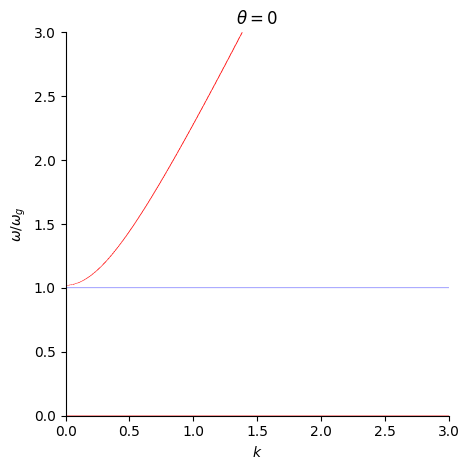

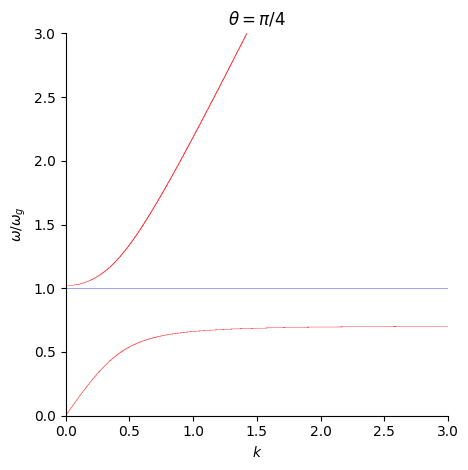

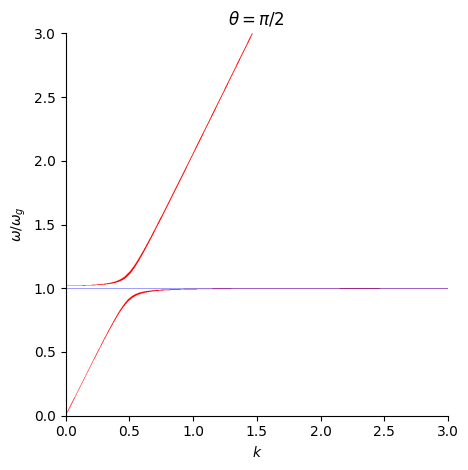

In [ ]:
for thet in thetas:
    plot_dict = dict(x_var=(k, 0, 3), y_var=(wr, 0, 3),
                     aspect_ratio=(5, 5), show=False)

    p1 = plot_implicit(func.subs({theta: thet[0]}), 
                       line_color='red', title= thet[1], **plot_dict)
    p2 = plot_implicit(Eq(wr, 1),
                       line_color='blue', **plot_dict)
    p1.extend(p2)
    p1.show()

- The mode with $\omega/\omega_g > 1$ is pressure-mode (p-mode) mainly driven by gas pressure.
- The mode with $\omega/\omega_g < 1$ is gravity-mode (g-mode) mainly driven by buoyancy.